In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('spaceship_titanic.csv')
dfnc = df[["Cabin", "Name"]]
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [27]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [28]:
df = df.drop(['Cabin'], axis=1)
df = df.drop(['Destination'], axis=1)
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Name'], axis=1)
df = df.drop(['VIP'], axis=1)
df

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [29]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [30]:
df.HomePlanet.fillna("Earth", inplace = True)
df.Age.fillna(df.Age.median(), inplace = True)
df.RoomService.fillna(df.RoomService.mean(), inplace = True)
df.FoodCourt.fillna(df.FoodCourt.mean(), inplace = True)
df.ShoppingMall.fillna(df.ShoppingMall.mean(), inplace = True)
df.Spa.fillna(df.Spa.mean(), inplace = True)
df.VRDeck.fillna(df.VRDeck.mean(), inplace = True)
df.CryoSleep.fillna(False, inplace = True)

df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\1963435631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.HomePlanet.fillna("Earth", inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\1963435631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

HomePlanet      0
CryoSleep       0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [31]:
df

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [32]:
df["HomePlanet"].replace("Earth", 0, inplace=True)
df["HomePlanet"].replace("Europa", 1, inplace=True)
df["HomePlanet"].replace("Mars", 2, inplace=True)

df["Transported"].replace(True, 1, inplace=True)
df["Transported"].replace(False, 0, inplace=True)

df["CryoSleep"].replace(True, 1, inplace=True)
df["CryoSleep"].replace(False, 0, inplace=True)

df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\3457502194.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["HomePlanet"].replace("Mars", 2, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\3457502194.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Transported"].repl

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...
8688,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0


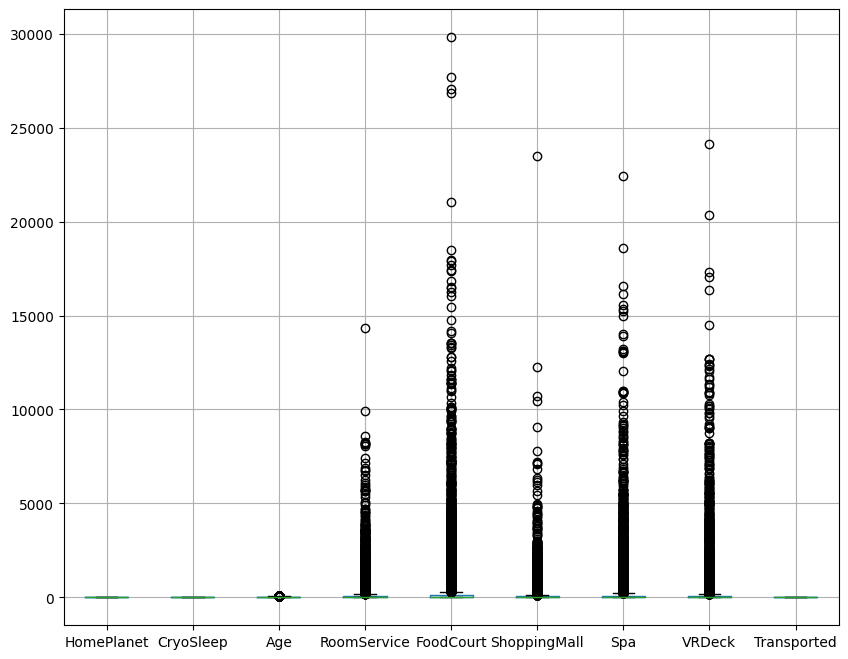

In [33]:
plt.figure(figsize=(10, 8))
bx = df.boxplot()
plt.show(bx)

In [34]:
for col in ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    #meth = df[col].max()
    Q25 = df[col].quantile(0.25)
    Q75 = df[col].quantile(0.75)

    IQR = Q75 - Q25

    lbound = Q25 - 1.5 * IQR
    ubound = Q75 + 1.5 * IQR

    print(lbound, ubound)

    df[col] = df[col].apply(lambda x: ubound if (x > ubound) else x)

df

-5.5 62.5
-117.0 195.0
-177.0 295.0
-67.5 112.5
-133.5 222.5
-106.5 177.5


,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,24.0,109.0,9.0,25.0,222.5,44.0,1
2,1,0,58.0,43.0,295.0,0.0,222.5,49.0,0
3,1,0,33.0,0.0,295.0,112.5,222.5,177.5,0
4,0,0,16.0,195.0,70.0,112.5,222.5,2.0,1
...,...,...,...,...,...,...,...,...,...
8688,1,0,41.0,0.0,295.0,0.0,222.5,74.0,0
8689,0,1,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,26.0,0.0,0.0,112.5,1.0,0.0,1
8691,1,0,32.0,0.0,295.0,0.0,222.5,177.5,0


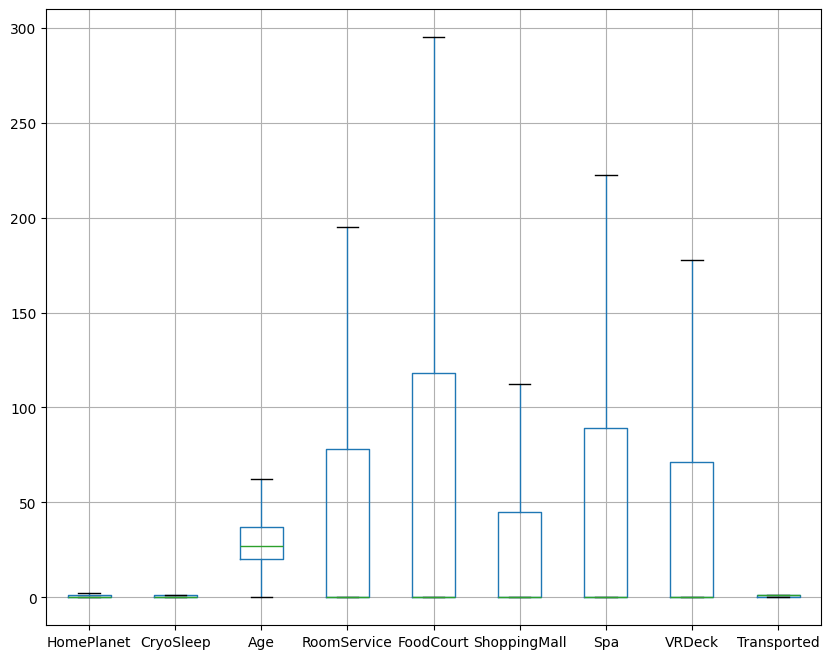

In [35]:
plt.figure(figsize=(10, 8))
bx = df.boxplot()
plt.show(bx)

In [36]:
for colname in df:
    df[colname] = (df[colname] - min(df[colname])) / (max(df[colname]) - min(df[colname]))

df

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.5,0.0,0.624,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.384,0.558974,0.030508,0.222222,1.000000,0.247887,1.0
2,0.5,0.0,0.928,0.220513,1.000000,0.000000,1.000000,0.276056,0.0
3,0.5,0.0,0.528,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
4,0.0,0.0,0.256,1.000000,0.237288,1.000000,1.000000,0.011268,1.0
...,...,...,...,...,...,...,...,...,...
8688,0.5,0.0,0.656,0.000000,1.000000,0.000000,1.000000,0.416901,0.0
8689,0.0,1.0,0.288,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8690,0.0,0.0,0.416,0.000000,0.000000,1.000000,0.004494,0.000000,1.0
8691,0.5,0.0,0.512,0.000000,1.000000,0.000000,1.000000,1.000000,0.0


In [37]:
def count_pokemons(row):
    cabin_number = row['Cabin']
    name_part = row['Name']
    if isinstance(name_part, str):
        name_part = name_part.split()[1]
        return dfnc[(dfnc['Cabin'] == cabin_number) & (dfnc['Name'].str.contains(name_part))].shape[0]
    else: return 0

# Применяем функцию для каждой записи в DataFrame
dfnc['Pokemons'] = dfnc.apply(count_pokemons, axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12520\3918948592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnc['Pokemons'] = dfnc.apply(count_pokemons, axis=1)


In [45]:
df["Pokemons"] = dfnc["Pokemons"]
df

,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Pokemons
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
1,0.0,0.558974,0.030508,0.222222,1.000000,0.247887,1.0,1
2,0.0,0.220513,1.000000,0.000000,1.000000,0.276056,0.0,2
3,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,2
4,0.0,1.000000,0.237288,1.000000,1.000000,0.011268,1.0,1
...,...,...,...,...,...,...,...,...
8688,0.0,0.000000,1.000000,0.000000,1.000000,0.416901,0.0,1
8689,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
8690,0.0,0.000000,0.000000,1.000000,0.004494,0.000000,1.0,1
8691,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,2


In [39]:
TargetFun = df["Transported"]
TargetFun

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 8693, dtype: float64

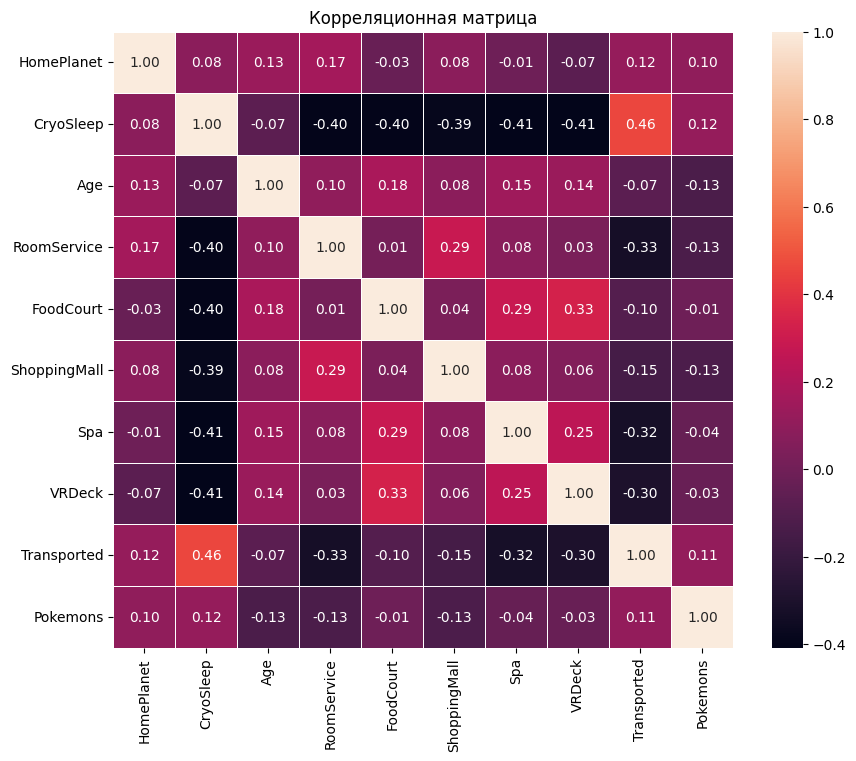

In [40]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

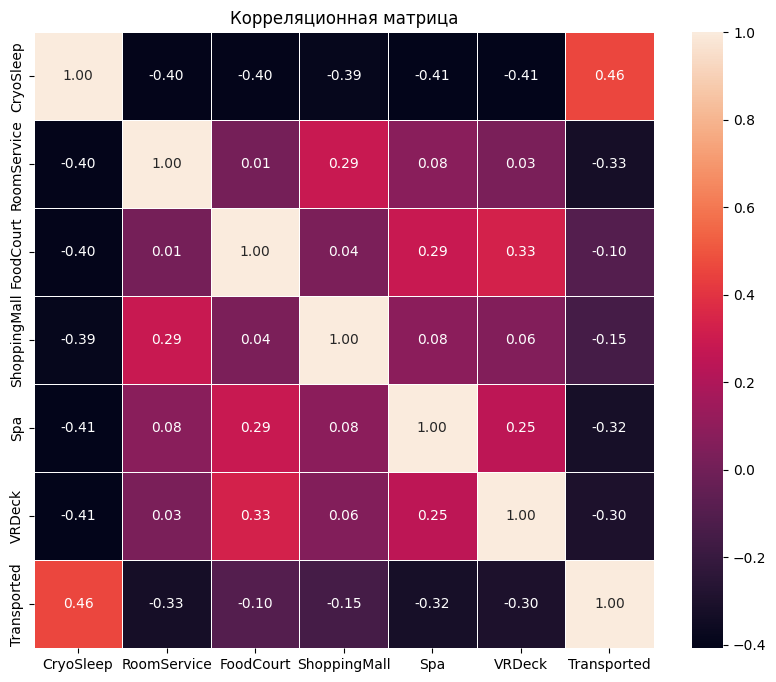

In [41]:
df = df.drop(['HomePlanet'], axis=1)
df = df.drop(['Age'], axis=1)
df = df.drop(['Pokemons'], axis=1)

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

## Случайный лес

In [42]:
Ytrain, Ytest, Xtrain, Xtest = train_test_split(TargetFun, df.drop(["Transported"], axis=1), test_size=0.3, train_size=0.7)

In [43]:
rf_model = RandomForestClassifier(n_estimators=100)  # 100 деревьев
rf_model.fit(Xtrain, Ytrain)
y_pred_rf = rf_model.predict(Xtest)

accuracy_score(Ytest, y_pred_rf)

0.7450153374233128

## XGBoost

In [48]:
xgb_model = XGBClassifier(n_estimators=1000, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(Xtrain, Ytrain)
y_pred_xgb = xgb_model.predict(Xtest)

accuracy_score(Ytest, y_pred_xgb)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.7423312883435583